In [1]:
import pandas as pd
import numpy as np
import time
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm

Using TensorFlow backend.


In [2]:
predictList = ["CC", "FX", "LN", "WM"]
for i in predictList:
    #print(locals()["%s_train"%i])
    train = pd.read_csv("../dataset_3/data_"+i+"_normalized_v2_3.csv", header=0)
    train = train.sort_values(["CUST_NO"])
    train = train.drop(["CUST_NO"], axis=1)
    test = train.drop(["ONE_17"], axis=1)
    locals()["%s_train"%i]=train
    locals()["%s_test"%i]=test
#CC_train.head()
#CC_train.info()
#CC_train.descrebe()

In [3]:
for i in predictList:
    train = locals()["%s_train"%i]
    X_train, X_test, y_train, y_test = train_test_split(train.drop('ONE_18', axis=1), train.ONE_18, train_size=0.9, test_size=0.1)
    locals()["%s_X_train"%i] = X_train
    locals()["%s_X_test"%i] = X_test
    locals()["%s_y_train"%i] = y_train
    locals()["%s_y_test"%i] = y_test

In [4]:
for i in predictList:
    X_train = locals()["%s_X_train"%i]
    X_test = locals()["%s_X_test"%i]
    y_train = locals()["%s_y_train"%i]
    y_test = locals()["%s_y_test"%i]
    model=RandomForestClassifier()
    start=time.time()
    model.fit(X_train,y_train)
    train_predict=model.predict(X_train)
    train_f1=metrics.f1_score(train_predict,y_train)
    train_accuracy=metrics.accuracy_score(train_predict,y_train)
    train_recall=metrics.recall_score(train_predict,y_train)
    print(i)
    print('在训练集上f1_mean的值为%.4f' % train_f1, end='\n')
    print('在训练集上精确率的值为%.4f' % train_accuracy, end='\n')
    print('在训练集上的召回率的值为%.4f' % train_recall)
    test_predict=model.predict(X_test)
    test_f1=metrics.f1_score(test_predict,y_test)
    test_accuracy=metrics.accuracy_score(test_predict,y_test)
    test_recall=metrics.recall_score(test_predict,y_test)
    print('='*50)
    print('在测试集上f1_mean的值为%.4f' % test_f1, end='\n')
    print('在测试集上精确率的值为%.4f' % test_accuracy, end='\n')
    print('在测试集上的召回率的值为%.4f' % test_recall)
    end=time.time()
    print('逻辑回归所用时间为%.4f' % (end-start))
    print('='*50)
    locals()["%s_model"%i] = model

CC
在训练集上f1_mean的值为0.8811
在训练集上精确率的值为0.9814
在训练集上的召回率的值为0.9712
在测试集上f1_mean的值为0.4755
在测试集上精确率的值为0.9323
在测试集上的召回率的值为0.7931
逻辑回归所用时间为0.2980
FX
在训练集上f1_mean的值为0.9458
在训练集上精确率的值为0.9821
在训练集上的召回率的值为0.9807
在测试集上f1_mean的值为0.5422
在测试集上精确率的值为0.8643
在测试集上的召回率的值为0.6342
逻辑回归所用时间为0.3104
LN
在训练集上f1_mean的值为0.9602
在训练集上精确率的值为0.9975
在训练集上的召回率的值为0.9951
在测试集上f1_mean的值为0.8497
在测试集上精确率的值为0.9923
在测试集上的召回率的值为0.9848
逻辑回归所用时间为0.2000
WM
在训练集上f1_mean的值为0.9492
在训练集上精确率的值为0.9955
在训练集上的召回率的值为0.9938
在测试集上f1_mean的值为0.7294
在测试集上精确率的值为0.9770
在测试集上的召回率的值为0.9490
逻辑回归所用时间为0.2372


[ 0.036509    0.00284406  0.423711    0.19146758  0.11819455  0.04618678
  0.05141156  0.02030576  0.02823799  0.01721013  0.00725285  0.00794539
  0.01786849  0.03085484]
0.423710998979
['THREE_17' 'GENDER_CODE' 'INCOME_RANGE_CODE' 'FOUR_17' 'AGE'
 'CUST_START_DT_W' 'EDU_CODE' 'CUST_START_DT_D' 'CUST_START_DT_M'
 'CUST_START_DT_Y']


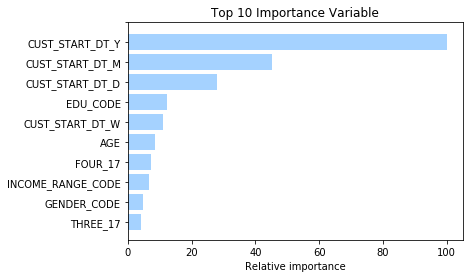

In [7]:
feature_importance = model.feature_importances_ #度量特征权重的接口
print(feature_importance) 
#特征的相关属性值
print(feature_importance.max())
#最大特征的属性值
feature_importance=100.0*(feature_importance/feature_importance.max())
index=np.argsort(feature_importance)[-10:] #倒序排列，倒数10个排名
plt.barh(np.arange(10), feature_importance[index], color='dodgerblue', alpha=0.4)
print(np.array(train.columns)[index])
plt.yticks(np.arange(10+0.25), np.array(train.columns)[index])
plt.xlabel('Relative importance')
plt.title('Top 10 Importance Variable')
plt.show()

In [ ]:
### SVM
# sv = svm.SVC(kernel ='linear')
# start = time.time()
# sv.fit(X_train,y_train)
# train_predict=sv.predict(X_train)
# train_f1=metrics.f1_score(train_predict,y_train)
# train_accuracy=metrics.accuracy_score(train_predict,y_train)
# train_recall=metrics.recall_score(train_predict,y_train)
# print('在训练集上f1_mean的值为%.4f' % train_f1, end='\n')
# print('在训练集上精确率的值为%.4f' % train_accuracy, end='\n')
# print('在训练集上的召回率的值为%.4f' % train_recall)
# test_predict=model.predict(X_test)
# test_f1=metrics.f1_score(test_predict,y_test)
# test_accuracy=metrics.accuracy_score(test_predict,y_test)
# test_recall=metrics.recall_score(test_predict,y_test)
# print('='*50)
# print('在测试集上f1_mean的值为%.4f' % test_f1, end='\n')
# print('在测试集上精确率的值为%.4f' % test_accuracy, end='\n')
# print('在测试集上的召回率的值为%.4f' % test_recall)
# end=time.time()
# print('SVM所用时间为%.4f' % (end-start))
#classifier = svm.SVC()
#classifier.fit(X_train, y_train)

In [ ]:
for i in predictList:
    model = locals()["%s_model"%i]
    res = model.predict(locals()["%s_test"%i])
    locals()["%s_res"%i] = res

In [ ]:
# count = 0
# for i in classifier_res:
#     if i:
#         count+=1
# count

In [ ]:
submit = pd.read_csv('../dataset/TBN_Y_ZERO.csv')
#submit = submit.drop(["FX_IND","FX_IND","LN_IND","WM_IND"], axis=1)
#submit = submit.sort_values(["CUST_NO"])
submit.head(n=5)

In [ ]:
for i in predictList:
    submit[i+"_IND"] = locals()["%s_res"%i]
    #submit["CC_IND"] = submit["CC_IND"].astype(int)
submit.head(n=-5)

In [ ]:
submit.to_csv('submit.csv', index= False)